In [7]:
import matplotlib.pyplot as plt
import tdt

import trompy as tp


%run "..//source//NAD functions.py"

In [2]:
folder = "D:\\Test Data\\photometry\\NAc GRAB photometry\\"

data = tdt.read_block(folder+"Test-220609-101142")

read from t=0s to t=3816.41s


In [14]:
licks = data.epocs._7RL_.onset
sipper = data.epocs._7sp_.onset
blue = data.streams._4657.data
uv = data.streams._4057.data

fs = data.streams._4657.fs

corrected_signal = tp.processdata(blue, uv)

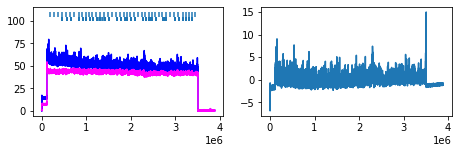

In [19]:
f, ax = plt.subplots(ncols=2, figsize=(7.5, 2))
ax[0].plot(blue, color="blue")
ax[0].plot(uv, color="magenta")

ax[1].plot(corrected_signal)

licks_in_samples = [int(event*fs) for event in licks]
sipper_in_samples = [int(event*fs) for event in sipper]

ax[0].vlines(licks_in_samples, 100, 105)
ax[0].vlines(sipper_in_samples, 105, 110)



In [20]:
lickdata = tp.lickCalc(licks)
runs = lickdata["rStart"]

c:\Users\jmc010\Miniconda3\envs\NAD\lib\site-packages\trompy\lick_utils.py:249: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


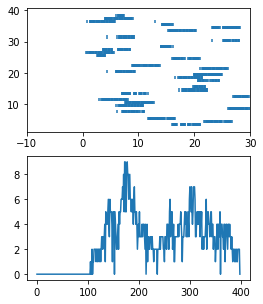

In [41]:
licks_aligned_to_sip = []
for sip in sipper:
    licks_aligned_to_sip.append([lick-sip for lick in licks if (lick>sip-10) and (lick<sip+30)])

f, ax = plt.subplots(nrows=2, figsize=(4, 5))

for idx, licks_in_trial in enumerate(licks_aligned_to_sip):
    ax[0].vlines(licks_in_trial, idx, idx+1)

ax[0].set_xlim([-10, 30])

bins=np.arange(-10, 30, 0.1)
licks_hist = np.histogram(tp.flatten_list(licks_aligned_to_sip), bins=bins)
ax[1].plot(licks_hist[0])


In [35]:
licks_aligned_to_sip
bins=np.arange(-10, 20, 300)
bins
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`. See the warnings section below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

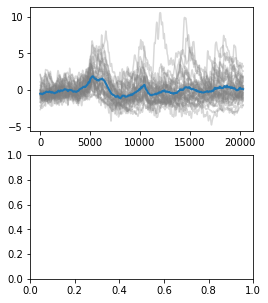

In [21]:
#aligned to first lick in run, NAD22
f, ax = plt.subplots(nrows=2, figsize=(4, 5))

snips = []

for run in runs:
    snip =get_snips_baseline(run, fs, corrected_signal, pre=5, length=20)
    snips.append(snip)
    ax[0].plot(snip, color="grey", alpha = 0.3)
    
snips = np.array(snips)
#snips =snips[0:-1]   #use only if the last trial is a different lenght from the others  
mean= np.mean(snips, axis=0)
ax[0].plot(mean, linewidth=2)